In [4]:
cd ..

/Users/sethhendrickson/cbbmodel


In [21]:
import pandas as pd
import numpy as np
from DB import DB
import matplotlib.pyplot as plt
import scipy.stats as scs

from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [6]:
def get_season(dt):
    year = dt.year
    month = dt.month
    if month > 6:
        return year + 1
    else:
        return year

In [7]:
df = pd.read_sql("SELECT * FROM games_test", DB.conn)

In [8]:
df['season'] = df.dt.map(lambda x: get_season(x))

In [9]:
df = df[~df.neutral]
df = df[(~pd.isnull(df.ateam_id)) & (~pd.isnull(df.hteam_id))]

In [10]:
# join on season=season, hteam=ateam and ateam=hteam
homehome = df.merge(df, left_on=['season', 'hteam_id', 'ateam_id'], \
                   right_on=['season', 'ateam_id', 'hteam_id'])

In [28]:
homehome['hmargin1'] = homehome.home_score_x - homehome.away_score_x
homehome['hmargin2'] = homehome.home_score_y - homehome.away_score_y
homehome['hwin1'] = homehome.hmargin1 > 0
homehome['hwin2'] = homehome.hmargin2 > 0

6.32229471464 212.758053033 -51.0 84.0


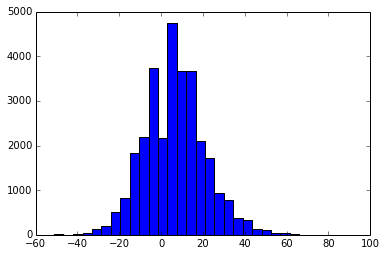

In [29]:
plt.hist(df.home_score - df.away_score, bins=30)
n, (mn, mx), mean, var, skew, kurt = scs.describe(df.home_score - df.away_score)
print mean, var, mn, mx

<Container object of 100 artists>

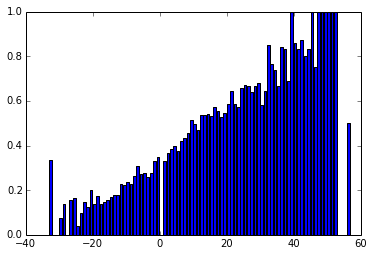

In [30]:
gb = homehome.groupby('hmargin1').mean()
plt.bar(gb.index.values, 1.0 - gb.hwin2)

<Container object of 100 artists>

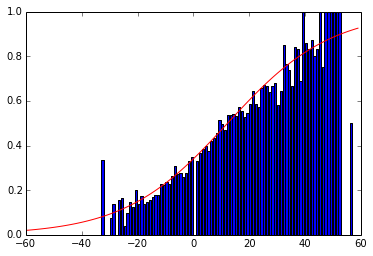

In [32]:
logit = LogisticRegression()
logit.fit(homehome.hmargin1[:,np.newaxis], homehome.hwin2)
x = np.arange(-60, 60)[:, np.newaxis]
plt.plot(x, logit.predict_proba(x)[:,0], c='r')
plt.bar(gb.index.values, 1.0 - gb.hwin2)

In [24]:
homehome[['dt_x', 'dt_y', 'hteam_id_x', 'ateam_id_x', 'hteam_id_y', 'ateam_id_y']].head()

,dt_x,dt_y,hteam_id_x,ateam_id_x,hteam_id_y,ateam_id_y
0,2010-12-29,2011-01-22,207,102,102,207
1,2010-12-31,2011-01-27,294,102,102,294
2,2011-01-06,2011-02-13,102,440,440,102
3,2011-01-08,2011-02-10,102,441,441,102
4,2011-01-13,2011-02-26,758,102,102,758
